In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, plot_confusion_matrix

In [2]:
df=pd.read_csv('spam.csv',encoding="ISO-8859-1")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


<AxesSubplot:xlabel='v1', ylabel='count'>

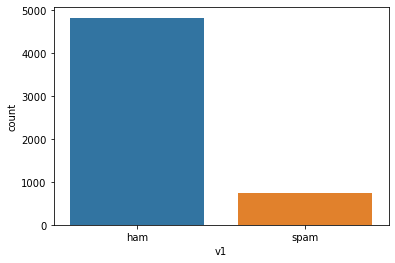

In [25]:
sns.countplot(data=df,x='v1')

In [4]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [5]:
X=df['v2']

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [7]:
tfid=TfidfVectorizer(stop_words='english')

In [8]:
y=df['v1']

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
X_train=tfid.fit_transform(X_train)

In [12]:
X_test=tfid.transform(X_test)

In [13]:
from sklearn.model_selection import GridSearchCV

In [14]:
def solve(model,X_train,X_test,y_train,y_test,param_grid):
    grid=GridSearchCV(model,n_jobs=-1,param_grid=param_grid)
    grid.fit(X_train,y_train)
    pred=grid.predict(X_test)
    print(grid.best_estimator_)
    plot_confusion_matrix(grid,X_test,y_test)
    print(classification_report(y_test,pred))

In [15]:
from sklearn.linear_model import LogisticRegression

LogisticRegression(n_jobs=-1)
              precision    recall  f1-score   support

         ham       0.95      1.00      0.97       965
        spam       0.97      0.67      0.79       150

    accuracy                           0.95      1115
   macro avg       0.96      0.83      0.88      1115
weighted avg       0.95      0.95      0.95      1115



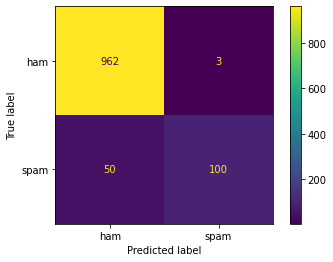

In [16]:
lg_model=LogisticRegression()
param_grid={'n_jobs':[-1]}
solve(lg_model,X_train,X_test,y_train,y_test,param_grid)

In [17]:
from sklearn.ensemble import RandomForestClassifier

RandomForestClassifier(n_estimators=50)
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       965
        spam       0.99      0.84      0.91       150

    accuracy                           0.98      1115
   macro avg       0.98      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



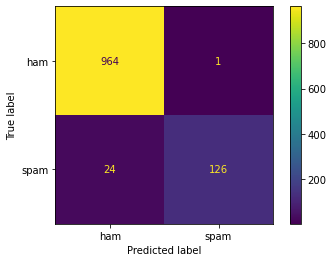

In [18]:
fst_model=RandomForestClassifier()
param_grid1={'n_estimators':[20,30,50],'bootstrap':[True]}
solve(fst_model,X_train,X_test,y_train,y_test,param_grid1)

In [19]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), learning_rate=0.5)
              precision    recall  f1-score   support

         ham       0.98      0.99      0.98       965
        spam       0.91      0.85      0.88       150

    accuracy                           0.97      1115
   macro avg       0.95      0.92      0.93      1115
weighted avg       0.97      0.97      0.97      1115



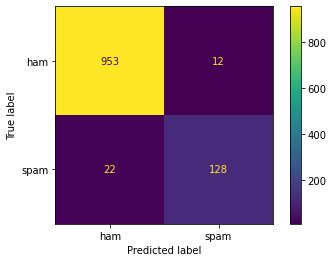

In [20]:
md=DecisionTreeClassifier()
ada_model=AdaBoostClassifier()
param_grid2={'base_estimator':[md],'n_estimators':[30,50,80],'learning_rate':[0.1,0.5,1,2,5]}
solve(ada_model,X_train,X_test,y_train,y_test,param_grid2)

In [21]:
from sklearn.ensemble import GradientBoostingClassifier

GradientBoostingClassifier(learning_rate=0.5, n_estimators=80)
              precision    recall  f1-score   support

         ham       0.97      1.00      0.98       965
        spam       0.97      0.81      0.88       150

    accuracy                           0.97      1115
   macro avg       0.97      0.90      0.93      1115
weighted avg       0.97      0.97      0.97      1115



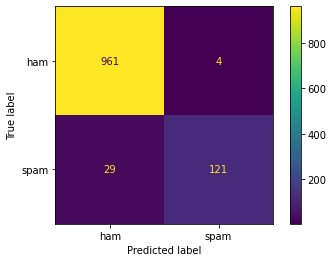

In [22]:
md=DecisionTreeClassifier()
grd_model=GradientBoostingClassifier()
param_grid3={'loss':['deviance', 'exponential'],'n_estimators':[30,50,80],'learning_rate':[0.1,0.5,1,2,5]}
solve(grd_model,X_train,X_test,y_train,y_test,param_grid3)

In [23]:
from sklearn.svm import SVC

SVC(C=2)
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       965
        spam       0.99      0.85      0.91       150

    accuracy                           0.98      1115
   macro avg       0.98      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



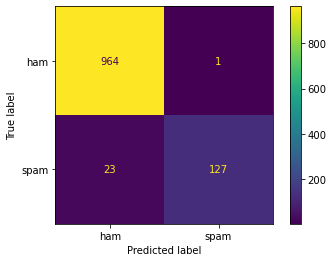

In [24]:
svc_model=SVC()
param_grid4={'C':[0.1,0.5,1,2,5],'gamma' : ['scale', 'auto'],}
solve(svc_model,X_train,X_test,y_train,y_test,param_grid4)

In [31]:
from sklearn.naive_bayes import MultinomialNB

MultinomialNB()
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       965
        spam       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



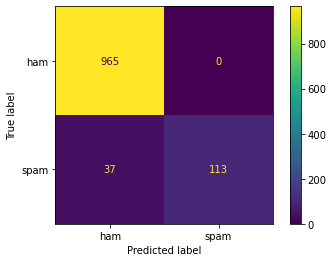

In [33]:
nv_model=MultinomialNB()
param_grid5={}
solve(nv_model,X_train,X_test,y_train,y_test,param_grid5)